In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


In [5]:
student = pd.read_csv('Student_Performance_Missing.csv')
student.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.0,Yes,9.0,1.0,91.0
1,4.0,82.0,No,4.0,2.0,65.0
2,8.0,51.0,Yes,7.0,2.0,45.0
3,5.0,52.0,Yes,5.0,2.0,36.0
4,7.0,NaN,No,8.0,5.0,66.0


In [6]:
student.isnull().sum()

Hours Studied                       1046
Previous Scores                      991
Extracurricular Activities           976
Sleep Hours                          954
Sample Question Papers Practiced    1035
Performance Index                    998
dtype: int64

In [7]:
num_cols= student.select_dtypes('number').columns
print(num_cols.tolist())

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


In [8]:
cat_cols = student.select_dtypes(exclude='number').columns
print(cat_cols.tolist())

['Extracurricular Activities']


In [9]:
num_imp=SimpleImputer()
cat_imp=SimpleImputer(strategy='most_frequent')

In [10]:
student[num_cols] = num_imp.fit_transform(student[num_cols])
student

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.000000,Yes,9.000000,1.0,91.000000
1,4.0,82.000000,No,4.000000,2.0,65.000000
2,8.0,51.000000,Yes,7.000000,2.0,45.000000
3,5.0,52.000000,Yes,5.000000,2.0,36.000000
4,7.0,69.448995,No,8.000000,5.0,66.000000
...,...,...,...,...,...,...
9995,1.0,49.000000,Yes,4.000000,2.0,23.000000
9996,7.0,64.000000,Yes,8.000000,5.0,58.000000
9997,6.0,83.000000,NaN,8.000000,5.0,55.213175
9998,9.0,97.000000,Yes,6.532169,0.0,95.000000


In [11]:
student[['Extracurricular Activities']]= cat_imp.fit_transform(student[['Extracurricular Activities']])
student

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7.0,99.000000,Yes,9.000000,1.0,91.000000
1,4.0,82.000000,No,4.000000,2.0,65.000000
2,8.0,51.000000,Yes,7.000000,2.0,45.000000
3,5.0,52.000000,Yes,5.000000,2.0,36.000000
4,7.0,69.448995,No,8.000000,5.0,66.000000
...,...,...,...,...,...,...
9995,1.0,49.000000,Yes,4.000000,2.0,23.000000
9996,7.0,64.000000,Yes,8.000000,5.0,58.000000
9997,6.0,83.000000,No,8.000000,5.0,55.213175
9998,9.0,97.000000,Yes,6.532169,0.0,95.000000


In [12]:
print(student.isnull().sum())


Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [13]:
ex_activity_enc = OneHotEncoder(drop ='first')
ex_activity_dummy = ex_activity_enc.fit_transform(student[['Extracurricular Activities']]).toarray()
ex_activity_dummy_student = pd.DataFrame(ex_activity_dummy)

In [14]:
ex_activity_dummy_student = pd.DataFrame(
    ex_activity_dummy, 
    columns=['Extracurricular_Activities_Yes'],  # Name it clearly
    index=student.index  # Keep the same index
)


In [15]:
ex_activity_dummy_student

,Extracurricular_Activities_Yes
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
9995,1.0
9996,1.0
9997,0.0
9998,1.0


In [16]:
clean_student = pd.concat([student,ex_activity_dummy_student],axis=1).drop(columns =['Extracurricular Activities'])

In [17]:
clean_student

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular_Activities_Yes
0,7.0,99.000000,9.000000,1.0,91.000000,1.0
1,4.0,82.000000,4.000000,2.0,65.000000,0.0
2,8.0,51.000000,7.000000,2.0,45.000000,1.0
3,5.0,52.000000,5.000000,2.0,36.000000,1.0
4,7.0,69.448995,8.000000,5.0,66.000000,0.0
...,...,...,...,...,...,...
9995,1.0,49.000000,4.000000,2.0,23.000000,1.0
9996,7.0,64.000000,8.000000,5.0,58.000000,1.0
9997,6.0,83.000000,8.000000,5.0,55.213175,0.0
9998,9.0,97.000000,6.532169,0.0,95.000000,1.0


In [18]:
scaler = StandardScaler()
clean_student[num_cols] = scaler.fit_transform(clean_student[num_cols])
clean_student

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular_Activities_Yes
0,0.825330,1.791777,1.532190,-1.315677,1.964003e+00,1.0
1,-0.401023,0.761010,-1.572135,-0.947576,5.371069e-01,0.0
2,1.234114,-1.118625,0.290460,-0.947576,-5.605053e-01,1.0
3,0.007761,-1.057992,-0.951270,-0.947576,-1.054431e+00,1.0
4,0.825330,0.000000,0.911325,0.156725,5.919875e-01,0.0
...,...,...,...,...,...,...
9995,-1.627376,-1.239892,-1.572135,-0.947576,-1.767879e+00,1.0
9996,0.825330,-0.330391,0.911325,0.156725,1.529427e-01,1.0
9997,0.416545,0.821643,0.911325,0.156725,3.899502e-16,0.0
9998,1.642898,1.670511,0.000000,-1.683777,2.183525e+00,1.0


In [19]:
# X = all features (input variables)
X = student[['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced','Extracurricular Activities']
]
# y = target variable
y = student['Performance Index']


In [20]:
from sklearn.model_selection import train_test_split 

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [22]:
#training the model on training set 
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)


ValueError: could not convert string to float: 'No'

In [ ]:
y_pred = regressor.predict(X_test)


<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

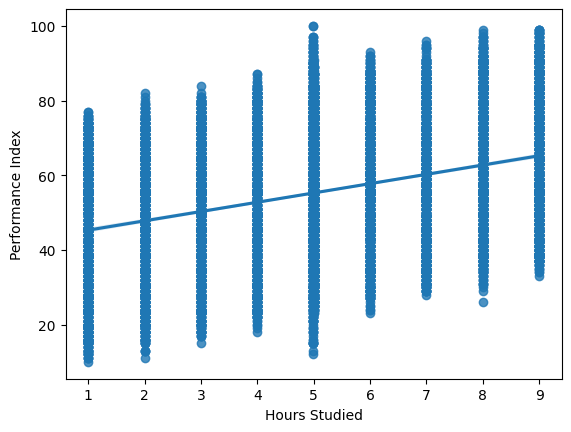

In [ ]:
sns.regplot(student,x='Hours Studied',y = 'Performance Index')

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

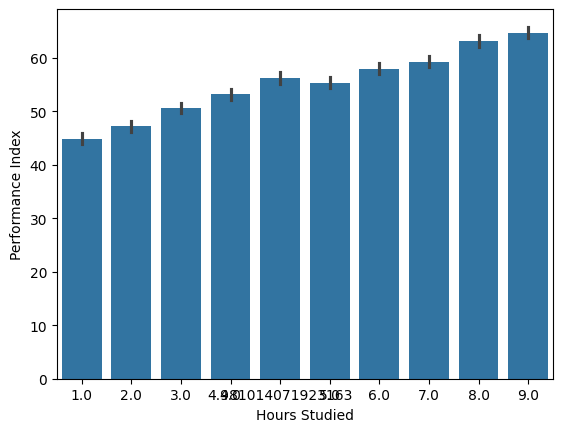

In [ ]:
sns.barplot(student,x='Hours Studied',y='Performance Index')

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

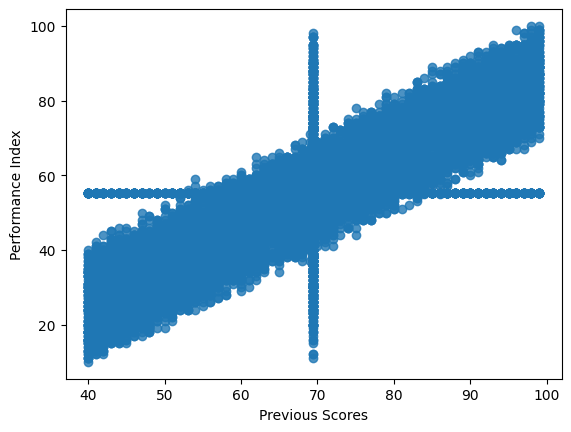

In [ ]:
sns.regplot(student,x='Previous Scores',y='Performance Index')

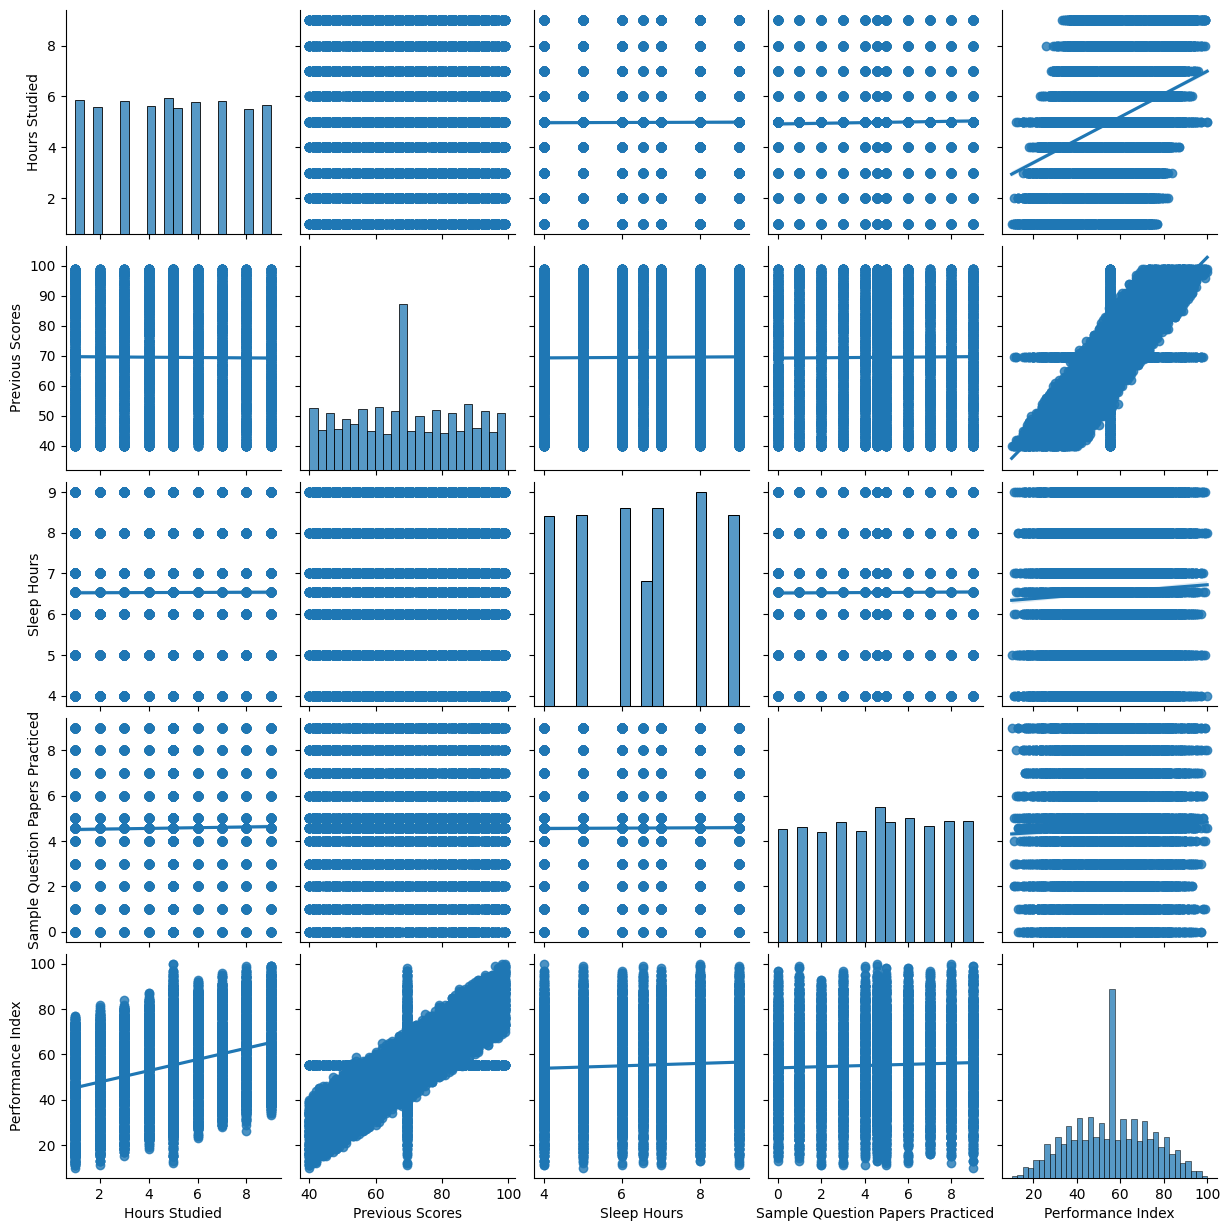

In [ ]:
sns.pairplot(student,kind='reg')